<a id='Title-Binary-Classification'></a>
<h1 style="color:SlateGray;">Binary Classification</h1>

**Input dataset**

IMBD: set of movie reviews with adjustable limit on max word count.

**Output classification**

Binary categorization (positive/negative) of a movie review.

<h2 style="color:SlateGray;">Background</h2>

**Layers**

[*Dense*](1_Image_Classification.ipynb#Layers-Dense)
		
**Activations**

[*relu*](1_Image_Classification.ipynb#Activations-relu)

<a id='Activations-sigmoid'></a>
*sigmoid*

Used to return a probability of binary classes.

Derived from the [softmax](1_Image_Classification.ipynb#Activations-softmax) function when the number of classes is 2.
		
**Optimizers**

[*rmsprop*](1_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

<a id='Loss-functions-binary_crossentropy'></a>
*binary_crossentropy*

Used to measure the predictive performance of binary classification models.

Derived from the [categorical_crossentropy](1_Image_Classification.ipynb#Loss-functions-categorical_crossentropy) function when the number of classes is 2.

<h2 style="color:SlateGray;">Overview</h2>

Predict whether a written movie review is overall positive or negative.

The input data set consists of 25,000 training samples and 25,000 test samples, the associated labels contain either 0 or 1 (positive or negative). This example encodes each review by the 10,000 most frequently used words. The training samples are partitioned to be 15,000 training and 10,000 validation, each sample is one-hot encoded.

In [1]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.2.2


In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros( ( len(sequences), dimension ) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
from keras import models
from keras import layers

model1 = models.Sequential()
model1.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model1.add(layers.Dense(16, activation="relu"))
model1.add(layers.Dense(1, activation="sigmoid"))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras import optimizers
from keras import losses
from keras import metrics

model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [7]:
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict1 = history1.history
history_dict1.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 341us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1150 - binary_accuracy: 0.9650 - val_loss: 0.3166 - val_bi

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

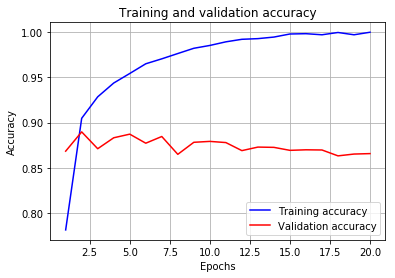

In [9]:
import matplotlib.pyplot as plt

acc = history1.history["binary_accuracy"]
val_acc = history1.history["val_binary_accuracy"]
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

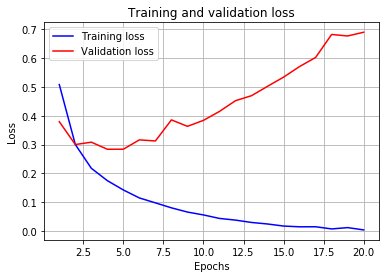

In [10]:
plt.clf()

plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [11]:
model2 = models.Sequential()
model2.add(layers.Dense(10, activation="relu", input_shape=(10000,)))
model2.add(layers.Dense(1, activation="sigmoid"))

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history2 = model2.fit(x_train, y_train, 
                      epochs=10, 
                      batch_size=512)

history2_dict = history2.history
history2_dict.keys()

Epoch 1/10
25000/25000 [==============================] - 3s 125us/step - loss: 0.4577 - acc: 0.8291
Epoch 2/10
25000/25000 [==============================] - 2s 100us/step - loss: 0.2886 - acc: 0.9052
Epoch 3/10
25000/25000 [==============================] - 2s 100us/step - loss: 0.2295 - acc: 0.9234
Epoch 4/10
25000/25000 [==============================] - 3s 122us/step - loss: 0.1964 - acc: 0.9335
Epoch 5/10
25000/25000 [==============================] - 3s 110us/step - loss: 0.1738 - acc: 0.9422
Epoch 6/10
25000/25000 [==============================] - 3s 104us/step - loss: 0.1570 - acc: 0.9476
Epoch 7/10
25000/25000 [==============================] - 3s 109us/step - loss: 0.1428 - acc: 0.9533
Epoch 8/10
25000/25000 [==============================] - 3s 102us/step - loss: 0.1316 - acc: 0.9570
Epoch 9/10
25000/25000 [==============================] - 2s 96us/step - loss: 0.1212 - acc: 0.9610
Epoch 10/10
25000/25000 [==============================] - 2s 99us/step - loss: 0.1135 - acc

dict_keys(['loss', 'acc'])

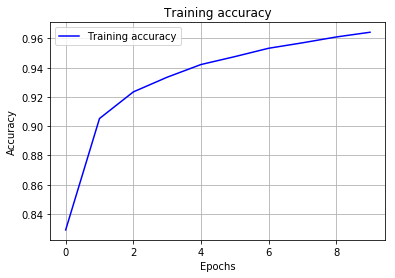

In [12]:
import matplotlib.pyplot as plt

acc = history2.history["acc"]
loss = history2.history["loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "b", label="Training accuracy")
plt.title("Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

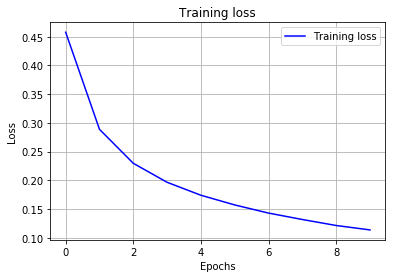

In [13]:
plt.clf()

plt.plot(epochs, loss, "b", label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [14]:
print('<<< model1 >>>')
results = model1.evaluate(x_test, y_test)
print(results) # (loss, accuracy)

print('<<< model2 >>>')
results = model2.evaluate(x_test, y_test)
print(results) # (loss, accuracy)

<<< model1 >>>
25000/25000 [==============================] - 4s 162us/step
[0.7630399031662941, 0.85064]
<<< model2 >>>
25000/25000 [==============================] - 4s 149us/step
[0.3431195530128479, 0.87216]


In [15]:
print('<<< model1 >>>')
prediction = model1.predict(x_test)
print(prediction)

print('<<< model2 >>>')
prediction = model2.predict(x_test)
print(prediction)

<<< model1 >>>
[[0.00700265]
 [0.9999999 ]
 [0.8997707 ]
 ...
 [0.0017704 ]
 [0.00568429]
 [0.5428282 ]]
<<< model2 >>>
[[0.11949197]
 [0.9999844 ]
 [0.44763622]
 ...
 [0.10883356]
 [0.03314958]
 [0.586233  ]]
